# Define the 4-bit parity problem

In [ ]:
def parity4(x1, x2, x3, x4):
    return (x1 + x2 + x3 + x4) % 2 == 1

In [ ]:
def generate_data_points():
    binary_values = [0, 1]
    data_points = [(x1, x2, x3, x4, parity4(x1, x2, x3, x4))
                   for x1 in binary_values
                   for x2 in binary_values
                   for x3 in binary_values
                   for x4 in binary_values]
    return data_points

In [ ]:
data_points = generate_data_points()
print(data_points)

[(0, 0, 0, 0, False), (0, 0, 0, 1, True), (0, 0, 1, 0, True), (0, 0, 1, 1, False), (0, 1, 0, 0, True), (0, 1, 0, 1, False), (0, 1, 1, 0, False), (0, 1, 1, 1, True), (1, 0, 0, 0, True), (1, 0, 0, 1, False), (1, 0, 1, 0, False), (1, 0, 1, 1, True), (1, 1, 0, 0, False), (1, 1, 0, 1, True), (1, 1, 1, 0, True), (1, 1, 1, 1, False)]


# Genetic constants:

In [ ]:
HALL_OF_FAME_SIZE = 1

In [ ]:
POPULATION_SIZE = 500
MAX_GENERATIONS = 50

In [ ]:
MIN_TREE_HEIGHT = 3
MAX_TREE_HEIGHT = 5
LIMIT_TREE_HEIGHT = 17

In [ ]:
MUT_MIN_TREE_HEIGHT = 0
MUT_MAX_TREE_HEIGHT = 2
NUM_INPUTS = 4
NUM_COMBINATIONS = 2 ** NUM_INPUTS

# GP Setup

In [ ]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.6 MB/s eta 0:00:00


In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
import operator
import math
import random
import numpy
from deap import algorithms, base, creator, tools, gp
import matplotlib.pyplot as plt
import itertools
import networkx as nx



In [ ]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [ ]:
parityIn = list(itertools.product([0, 1], repeat=NUM_INPUTS))
parityOut = [sum(row) % 2 for row in parityIn]

In [ ]:
def parityError(individual):
    func = toolbox.compile(expr=individual)
    return sum(func(*pIn) != pOut for pIn, pOut in zip(parityIn, parityOut))

In [ ]:
def getCost(individual):
    return parityError(individual),

In [ ]:
pset1 = gp.PrimitiveSet("PSET1", 4)
pset1.addPrimitive(operator.and_, 2)
pset1.addPrimitive(operator.or_, 2)
pset1.addPrimitive(operator.not_, 1)

In [ ]:
pset2 = gp.PrimitiveSet("PSET2", 4)
pset2.addPrimitive(operator.and_, 2)
pset2.addPrimitive(operator.or_, 2)
pset2.addPrimitive(operator.xor, 2)
pset2.addPrimitive(operator.not_, 1)

In [ ]:
def if_then_else(condition, out1, out2):
    return out1 if condition else out2


# GE Setup


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Clone this repository in which we have all functions and classes created or adapted to this work.

In [ ]:
import os.path

PATH = '/content/drive/MyDrive/grape/'
if os.path.exists(PATH):
    print('grape directory already exists')
else:
    %cd /content/drive/MyDrive/
    !git clone https://github.com/UL-BDS/grape.git
    print('Cloning grape in your Drive')

%cd /content/drive/MyDrive/grape/

grape directory already exists
/content/drive/MyDrive/grape



Import our algorithms, adapted from deap.algorithms.

Import DEAP.

Import functions used by our grammars.



In [ ]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install grape

In [ ]:
!pip install deap

In [ ]:
pip install algorithms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 4.7 MB/s eta 0:00:00


In [ ]:
pip install functions

  Preparing metadata (setup.py) ... done
  Created wheel for functions: filename=functions-0.7.0-py3-none-any.whl size=3037 sha256=d907089a16c5db21c43c49c9752fd20e91a595e09d49a37ae9b2bdcee8a049f9
  Stored in directory: /root/.cache/pip/wheels/92/90/bc/01eb2f163bcfa49c7ad5072fbe9d243038368b9001ec26a9da
Successfully built functions


In [ ]:
import grape
import algorithms
from functions import not_, and_, or_, nand_, nor_

from os import path
import pandas as pd
import numpy as np
from deap import creator, base, tools

import random
import matplotlib.pyplot as plt

Set our Grammatical Evolution parameters.

In [ ]:
ELITE_SIZE = 1
CODON_CONSUMPTION = 'lazy'
GENOME_REPRESENTATION = 'list'
MAX_GENOME_LENGTH = None
MAX_INIT_TREE_DEPTH = 13
MIN_INIT_TREE_DEPTH = 3
MAX_TREE_DEPTH = 35
MAX_WRAPS = 0
CODON_SIZE = 255
REPORT_ITEMS = ['gen', 'invalid', 'avg', 'std', 'min', 'max', 'best_ind_length', 'avg_length', 'best_ind_nodes', 'avg_nodes', 'avg_depth', 'avg_used_codons', 'best_ind_used_codons', 'selection_time', 'generation_time']

# Setup 1

In [ ]:
P_CROSSOVER = 0.7
P_MUTATION = 0.01

# GP Implementation 1

PSET 1

In [ ]:
toolbox = base.Toolbox()
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)
toolbox.register("expr", gp.genFull, pset=pset1, min_=MIN_TREE_HEIGHT, max_=MAX_TREE_HEIGHT)
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)
toolbox.register("compile", gp.compile, pset=pset1)
toolbox.register("evaluate", getCost)
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genGrow, min_=MUT_MIN_TREE_HEIGHT, max_=MUT_MAX_TREE_HEIGHT)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset1)
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=LIMIT_TREE_HEIGHT))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=LIMIT_TREE_HEIGHT))

In [ ]:
population = toolbox.populationCreator(n=POPULATION_SIZE)
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

In [ ]:
stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", numpy.mean)
mstats.register("std", numpy.std)
mstats.register("min", numpy.min)
mstats.register("max", numpy.max)

In [ ]:
population, logbook = algorithms.eaSimple(population,toolbox,cxpb=P_CROSSOVER,mutpb=P_MUTATION,ngen=MAX_GENERATIONS,stats=mstats,halloffame=hof,verbose=True)

   	      	                    fitness                     	                      size                     
   	      	------------------------------------------------	-----------------------------------------------
gen	nevals	avg  	gen	max	min	nevals	std     	avg   	gen	max	min	nevals	std    
0  	500   	8.022	0  	10 	6  	500   	0.466386	19.562	0  	61 	4  	500   	11.5514
1  	377   	7.894	1  	9  	6  	377   	0.454713	20.352	1  	56 	2  	377   	12.3751
2  	341   	7.852	2  	9  	5  	341   	0.492033	20.254	2  	56 	2  	341   	12.2712
3  	357   	7.756	3  	9  	5  	357   	0.569617	20.752	3  	64 	2  	357   	12.3513
4  	339   	7.658	4  	9  	5  	339   	0.633274	22.238	4  	64 	2  	339   	12.4033
5  	341   	7.516	5  	10 	5  	341   	0.676568	25.35 	5  	62 	2  	341   	13.3451
6  	365   	7.432	6  	10 	5  	365   	0.688023	29.156	6  	72 	2  	365   	13.5526
7  	350   	7.374	7  	9  	5  	350   	0.705779	30.71 	7  	76 	2  	350   	13.6328
8  	351   	7.32 	8  	9  	5  	351   	0.708237	32.858	8  	80 	2  	351   	14

-- Best Individual =  and_(and_(or_(or_(not_(or_(ARG3, ARG2)), not_(or_(and_(or_(ARG1, ARG3), ARG2), and_(or_(ARG0, ARG1), or_(and_(and_(ARG3, ARG0), or_(ARG3, ARG1)), or_(ARG0, not_(ARG3))))))), and_(and_(ARG3, ARG0), or_(ARG3, ARG1))), not_(and_(not_(ARG1), and_(ARG1, and_(or_(not_(and_(ARG2, ARG1)), not_(and_(ARG2, ARG0))), and_(not_(and_(ARG3, ARG1)), or_(and_(not_(or_(ARG0, ARG0)), and_(ARG3, ARG1)), or_(and_(or_(ARG1, ARG2), and_(ARG0, ARG3)), ARG1)))))))), and_(or_(not_(ARG1), not_(and_(or_(not_(ARG0), ARG2), ARG3))), and_(or_(not_(ARG0), or_(ARG3, ARG3)), or_(and_(not_(or_(ARG0, ARG2)), and_(ARG3, not_(or_(not_(and_(not_(ARG2), or_(ARG1, ARG3))), and_(not_(and_(ARG2, ARG3)), ARG1))))), or_(ARG2, ARG1)))))
-- length=121, height=11
-- Best Fitness =  3.0


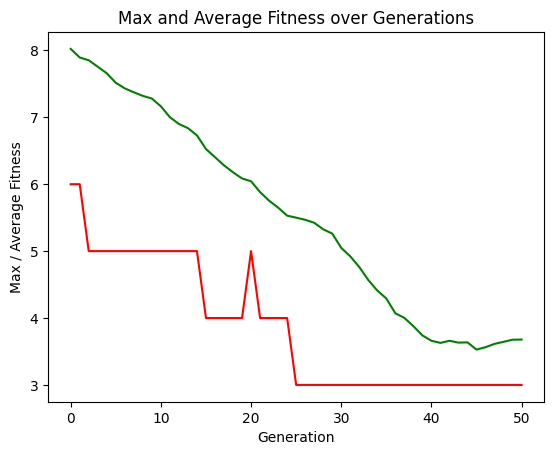

In [ ]:
maxFitnessValues, meanFitnessValues = logbook.chapters['fitness'].select("min", "avg")
best1 = hof.items[0]
print("-- Best Individual = ", best1)
print("-- length={}, height={}".format(len(best1), best1.height))
print("-- Best Fitness = ", best1.fitness.values[0])
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average Fitness over Generations')
plt.show()

-- Best Individual =  and_(and_(or_(or_(not_(or_(ARG3, ARG2)), not_(or_(and_(or_(ARG1, ARG3), ARG2), and_(or_(ARG0, ARG1), or_(and_(and_(ARG3, ARG0), or_(ARG3, ARG1)), or_(ARG0, not_(ARG3))))))), and_(and_(ARG3, ARG0), or_(ARG3, ARG1))), not_(and_(not_(ARG1), and_(ARG1, and_(or_(not_(and_(ARG2, ARG1)), not_(and_(ARG2, ARG0))), and_(not_(and_(ARG3, ARG1)), or_(and_(not_(or_(ARG0, ARG0)), and_(ARG3, ARG1)), or_(and_(or_(ARG1, ARG2), and_(ARG0, ARG3)), ARG1)))))))), and_(or_(not_(ARG1), not_(and_(or_(not_(ARG0), ARG2), ARG3))), and_(or_(not_(ARG0), or_(ARG3, ARG3)), or_(and_(not_(or_(ARG0, ARG2)), and_(ARG3, not_(or_(not_(and_(not_(ARG2), or_(ARG1, ARG3))), and_(not_(and_(ARG2, ARG3)), ARG1))))), or_(ARG2, ARG1)))))
-- length=121, height=11
-- Best Fitness =  3.0


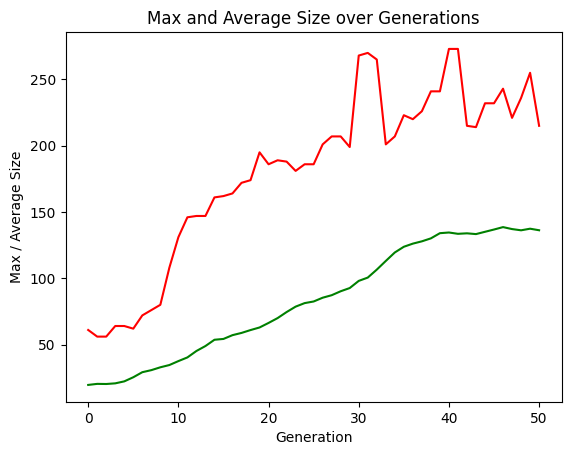

In [ ]:
maxFitnessValues, meanFitnessValues = logbook.chapters['size'].select("max", "avg")
best1 = hof.items[0]
print("-- Best Individual = ", best1)
print("-- length={}, height={}".format(len(best1), best1.height))
print("-- Best Fitness = ", best1.fitness.values[0])
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Size')
plt.title('Max and Average Size over Generations')
plt.show()

In [ ]:
gp_best_fitness_s1_pset1 = best1.fitness.values[0]
gp_generations_s1_pset1 = len(meanFitnessValues)

In [ ]:
toolbox = base.Toolbox()
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)
toolbox.register("expr", gp.genFull, pset=pset2, min_=MIN_TREE_HEIGHT, max_=MAX_TREE_HEIGHT)
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)
toolbox.register("compile", gp.compile, pset=pset2)
toolbox.register("evaluate", getCost)
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genGrow, min_=MUT_MIN_TREE_HEIGHT, max_=MUT_MAX_TREE_HEIGHT)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset2)
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=LIMIT_TREE_HEIGHT))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=LIMIT_TREE_HEIGHT))

In [ ]:
population = toolbox.populationCreator(n=POPULATION_SIZE)
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", numpy.mean)
mstats.register("std", numpy.std)
mstats.register("min", numpy.min)
mstats.register("max", numpy.max)
population, logbook = algorithms.eaSimple(population,toolbox,cxpb=P_CROSSOVER,mutpb=P_MUTATION,ngen=MAX_GENERATIONS,stats=mstats,halloffame=hof,verbose=True)
maxFitnessValues, meanFitnessValues = logbook.chapters['fitness'].select("min", "avg")
best2 = hof.items[0]

   	      	                    fitness                    	                      size                     
   	      	-----------------------------------------------	-----------------------------------------------
gen	nevals	avg  	gen	max	min	nevals	std    	avg  	gen	max	min	nevals	std    
0  	500   	7.968	0  	14 	4  	500   	1.05971	23.76	0  	60 	4  	500   	14.0413
1  	362   	7.638	1  	12 	4  	362   	1.0858 	24.344	1  	69 	2  	362   	14.568 
2  	345   	7.432	2  	12 	4  	345   	1.05517	26.256	2  	69 	2  	345   	14.7531
3  	362   	7.202	3  	11 	4  	362   	1.14943	29.9  	3  	75 	2  	362   	15.9964
4  	334   	7.058	4  	12 	2  	334   	1.23395	34.346	4  	86 	1  	334   	16.1521
5  	351   	6.858	5  	12 	2  	351   	1.36596	37.36 	5  	96 	2  	351   	16.451 
6  	310   	6.484	6  	12 	3  	310   	1.412  	40.252	6  	96 	2  	310   	16.6273
7  	356   	6.302	7  	12 	2  	356   	1.49358	42.418	7  	109	2  	356   	16.2554
8  	364   	6.158	8  	12 	2  	364   	1.61277	43.71 	8  	96 	4  	364   	16.6485
9  	360 

-- Best Individual =  xor(not_(xor(xor(not_(ARG2), or_(ARG3, and_(ARG1, ARG3))), and_(or_(ARG1, ARG3), not_(ARG0)))), or_(and_(xor(and_(ARG2, ARG2), or_(ARG0, or_(xor(and_(ARG3, or_(ARG0, ARG0)), not_(ARG2)), and_(not_(ARG2), or_(or_(xor(and_(xor(ARG3, ARG3), xor(ARG0, ARG1)), not_(or_(ARG3, ARG3))), or_(not_(and_(ARG0, ARG0)), xor(not_(ARG3), xor(ARG1, ARG2)))), ARG2))))), and_(ARG3, not_(ARG1))), and_(or_(ARG0, or_(ARG0, ARG0)), and_(not_(ARG1), xor(ARG0, ARG1)))))
-- length=79, height=12
-- Best Fitness =  3.0


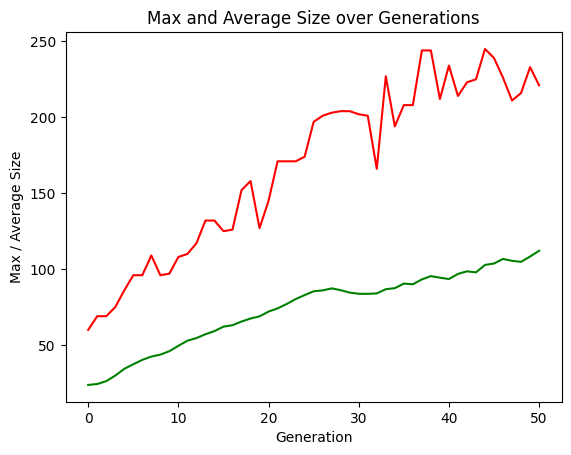

In [ ]:
maxFitnessValues, meanFitnessValues = logbook.chapters['size'].select("max", "avg")
best2 = hof.items[0]
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Size')
plt.title('Max and Average Size over Generations')
plt.show()

-- Best Individual =  xor(not_(xor(xor(not_(ARG2), or_(ARG3, and_(ARG1, ARG3))), and_(or_(ARG1, ARG3), not_(ARG0)))), or_(and_(xor(and_(ARG2, ARG2), or_(ARG0, or_(xor(and_(ARG3, or_(ARG0, ARG0)), not_(ARG2)), and_(not_(ARG2), or_(or_(xor(and_(xor(ARG3, ARG3), xor(ARG0, ARG1)), not_(or_(ARG3, ARG3))), or_(not_(and_(ARG0, ARG0)), xor(not_(ARG3), xor(ARG1, ARG2)))), ARG2))))), and_(ARG3, not_(ARG1))), and_(or_(ARG0, or_(ARG0, ARG0)), and_(not_(ARG1), xor(ARG0, ARG1)))))
-- length=79, height=12
-- Best Fitness =  0.0


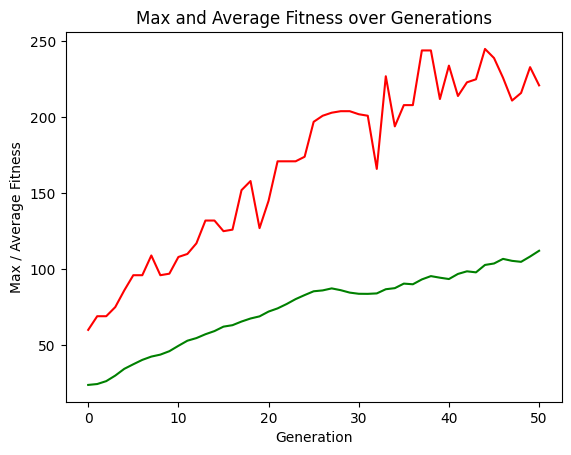

In [ ]:
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average Fitness over Generations')
plt.show()

In [ ]:
gp_best_fitness_s1_pset2 = best2.fitness.values[0]
gp_generations_s1_pset2 = len(meanFitnessValues)


# GE Implementation 1


In [ ]:
problem = 'parity4'

In [ ]:
if problem == 'parity3':
    X_train = np.zeros([3,8], dtype=bool)
    Y_train = np.zeros([8,], dtype=bool)

    data = pd.read_table(r"datasets/parity3.csv")
    for i in range(3):
        for j in range(8):
            X_train[i,j] = data['d'+ str(i)].iloc[j]
    for i in range(8):
        Y_train[i] = data['output'].iloc[i]

    GRAMMAR_FILE = 'parity3.bnf'

elif problem == 'parity4':
    X_train = np.zeros([4,16], dtype=bool)
    Y_train = np.zeros([16,], dtype=bool)
    data = pd.read_table(r"datasets/parity4.csv")
    for i in range(4):
        for j in range(16):
            X_train[i,j] = data['d'+ str(i)].iloc[j]
    for i in range(16):
        Y_train[i] = data['output'].iloc[i]
    GRAMMAR_FILE = 'parity4_v2.bnf'

elif problem == 'parity5':
    X_train = np.zeros([5,32], dtype=bool)
    Y_train = np.zeros([32,], dtype=bool)

    data = pd.read_table(r"datasets/parity5.csv")
    for i in range(5):
        for j in range(32):
            X_train[i,j] = data['d'+ str(i)].iloc[j]
    for i in range(32):
        Y_train[i] = data['output'].iloc[i]

    GRAMMAR_FILE = 'parity5.bnf'

Print data.

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10000)
pd.set_option('display.colheader_justify', 'center')

display(data)

,d0,d1,d2,d3,output
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,1,1
4,0,1,0,0,0
5,0,1,0,1,1
6,0,1,1,0,1
7,0,1,1,1,0
8,1,0,0,0,0
9,1,0,0,1,1


Print grammar.

In [ ]:
f = open("grammars/" + GRAMMAR_FILE, "r")
print(f.read())
f.close()

<e>  ::=  and_(<e>,<e>)|
          or_(<e>,<e>)|
          nand_(<e>,<e>)|
          nor_(<e>,<e>)|
		  x[0]|x[1]|x[2]|x[3]


Set up the grammar addressed by GRAMMAR_FILE in the class Grammar.

In [ ]:
BNF_GRAMMAR = grape.Grammar(path.join("grammars", GRAMMAR_FILE))

Define as fitness function the number of outputs wrongly predicted.

In [ ]:
def fitness_eval(individual, points):
    x = points[0]
    Y = points[1]

    if individual.invalid == True:
        return np.NaN,

    try:
        pred = eval(individual.phenotype)
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError):
        return np.NaN,
    assert np.isrealobj(pred)
    n_samples = len(Y)
    compare = np.equal(Y,pred)
    n_correct_outputs = np.sum(compare)

    fitness = n_samples - n_correct_outputs

    return fitness,

Create the deap toolbox.

Use negative weights in the `base.Fitness` since we are trying to minimise the fitness.

`grape.Individual` is a class with the following attributes: `phenotype`, `nodes`, `depth`, `used_codons`, `invalid` (True or False), `n_wraps` and `self.structure`.

`grape.sensible_initialisation` initialises a whole population of GE individuals using Sensible Initialisation.

`tools.selTournament` usef Tournament to select parents.

`grape.crossover_onepoint` selects crossover points within the used portion of the genome.

Similarly, `grape.mutation_int_flip_per_codon` performs only over the effective length.



In [ ]:
toolbox = base.Toolbox()
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create('Individual', grape.Individual, fitness=creator.FitnessMin)
toolbox.register("populationCreator", grape.sensible_initialisation, creator.Individual)
toolbox.register("evaluate", fitness_eval)
toolbox.register("select", tools.selTournament, tournsize=6)
toolbox.register("mate", grape.crossover_onepoint)
toolbox.register("mutate", grape.mutation_int_flip_per_codon)

In [ ]:
population = toolbox.populationCreator(pop_size=POPULATION_SIZE,
                                      bnf_grammar=BNF_GRAMMAR,
                                      min_init_depth=MIN_INIT_TREE_DEPTH,
                                      max_init_depth=MAX_INIT_TREE_DEPTH,
                                      codon_size=CODON_SIZE,
                                      codon_consumption=CODON_CONSUMPTION,
                                      genome_representation=GENOME_REPRESENTATION
                                      )

In [ ]:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.nanmean)
stats.register("std", np.nanstd)
stats.register("min", np.nanmin)
stats.register("max", np.nanmax)

In [ ]:
population, logbook = algorithms.ge_eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, elite_size=ELITE_SIZE,
                                              bnf_grammar=BNF_GRAMMAR,
                                              codon_size=CODON_SIZE,
                                              max_tree_depth=MAX_TREE_DEPTH,
                                              max_genome_length=MAX_GENOME_LENGTH,
                                              points_train=[X_train, Y_train],
                                              codon_consumption=CODON_CONSUMPTION,
                                              report_items=REPORT_ITEMS,
                                              genome_representation=GENOME_REPRESENTATION,
                                              stats=stats, halloffame=hof, verbose=False)

gen = 0 , Best fitness = (5.0,)
gen = 1 , Best fitness = (5.0,) , Number of invalids = 45
gen = 2 , Best fitness = (5.0,) , Number of invalids = 43
gen = 3 , Best fitness = (5.0,) , Number of invalids = 31
gen = 4 , Best fitness = (5.0,) , Number of invalids = 18
gen = 5 , Best fitness = (5.0,) , Number of invalids = 18
gen = 6 , Best fitness = (5.0,) , Number of invalids = 12
gen = 7 , Best fitness = (5.0,) , Number of invalids = 10
gen = 8 , Best fitness = (5.0,) , Number of invalids = 8
gen = 9 , Best fitness = (5.0,) , Number of invalids = 7
gen = 10 , Best fitness = (5.0,) , Number of invalids = 1
gen = 11 , Best fitness = (5.0,) , Number of invalids = 3
gen = 12 , Best fitness = (5.0,) , Number of invalids = 10
gen = 13 , Best fitness = (5.0,) , Number of invalids = 7
gen = 14 , Best fitness = (5.0,) , Number of invalids = 4
gen = 15 , Best fitness = (5.0,) , Number of invalids = 7
gen = 16 , Best fitness = (5.0,) , Number of invalids = 2
gen = 17 , Best fitness = (5.0,) , Number

Extract statistics and build a nice looking table.

In [ ]:
max_fitness_values, mean_fitness_values = logbook.select("max", "avg")
min_fitness_values, std_fitness_values = logbook.select("min", "std")
best_ind_length = logbook.select("best_ind_length")
avg_length = logbook.select("avg_length")
selection_time = logbook.select("selection_time")
generation_time = logbook.select("generation_time")
gen, invalid = logbook.select("gen", "invalid")
avg_used_codons = logbook.select("avg_used_codons")
best_ind_used_codons = logbook.select("best_ind_used_codons")
best_ind_nodes = logbook.select("best_ind_nodes")
avg_nodes = logbook.select("avg_nodes")
avg_depth = logbook.select("avg_depth")
header = REPORT_ITEMS
results = pd.DataFrame(list(zip(gen, invalid, mean_fitness_values, std_fitness_values,
                                min_fitness_values, max_fitness_values,
                                best_ind_length, avg_length,
                                best_ind_nodes, avg_nodes,
                                avg_depth,
                                avg_used_codons, best_ind_used_codons,
                                selection_time, generation_time)),
               columns = header)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10000)
pd.set_option('display.colheader_justify', 'center')
display(results)

,gen,invalid,avg,std,min,max,best_ind_length,avg_length,best_ind_nodes,avg_nodes,avg_depth,avg_used_codons,best_ind_used_codons,selection_time,generation_time
0,0,0,7.996000,0.489882,5.0,11.0,6142,3174.672000,2048,1058.820000,8.590000,2116.640000,4095,0.000000,6.556662
1,1,45,7.964835,0.553584,5.0,10.0,6142,3843.874725,2048,345.232967,12.854945,689.465934,4095,0.003378,29.070599
2,2,43,7.862144,0.610476,5.0,10.0,6142,4166.354486,2048,236.483589,13.253829,471.967177,4095,0.003457,15.050057
3,3,31,7.827292,0.624672,5.0,10.0,6142,4313.083156,2048,223.537313,14.965885,446.074627,4095,0.003430,28.296273
4,4,18,7.744813,0.656301,5.0,10.0,6142,4346.736515,2048,163.628631,14.780083,326.257261,4095,0.003418,7.161112
5,5,18,7.740664,0.752014,5.0,11.0,6142,4049.751037,2048,122.854772,12.506224,244.709544,4095,0.003389,7.153342
6,6,12,7.569672,0.685971,5.0,10.0,6142,4200.331967,2048,94.975410,11.354508,188.950820,4095,0.003358,4.364327
7,7,10,7.506122,0.777859,5.0,10.0,6142,4302.640816,2048,81.336735,11.393878,161.673469,4095,0.003312,4.971539
8,8,8,7.400407,0.843579,5.0,10.0,6142,4137.036585,2048,50.461382,10.802846,99.922764,4095,0.009583,4.376060
9,9,7,7.322515,0.893656,5.0,10.0,6142,4059.417850,2048,74.269777,11.724138,147.539554,4095,0.003327,3.998274


Show the best individual as an expression.

In [ ]:
import textwrap
best = hof.items[0].phenotype

Plot graphs regarding the best fitness and the average fitness.

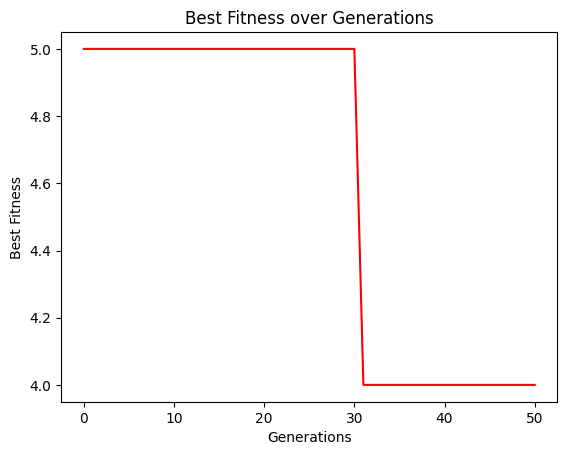

In [ ]:
plt.plot(min_fitness_values, color='red')
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.title('Best Fitness over Generations')
plt.show()

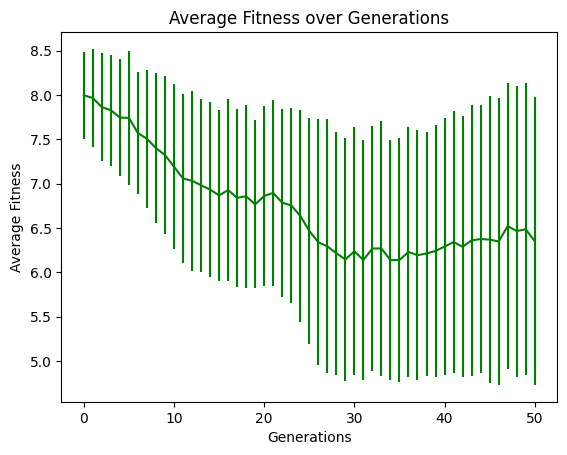

In [ ]:
gen = np.arange(0, 50+1)
plt.xlabel('Generations')
plt.ylabel('Average Fitness')
plt.title('Average Fitness over Generations')
plt.errorbar(gen, mean_fitness_values, yerr=std_fitness_values,label="Best", color="Green")
plt.show()

Plot graphs regarding the length of the genome: the average of the population and that one of the best individual.


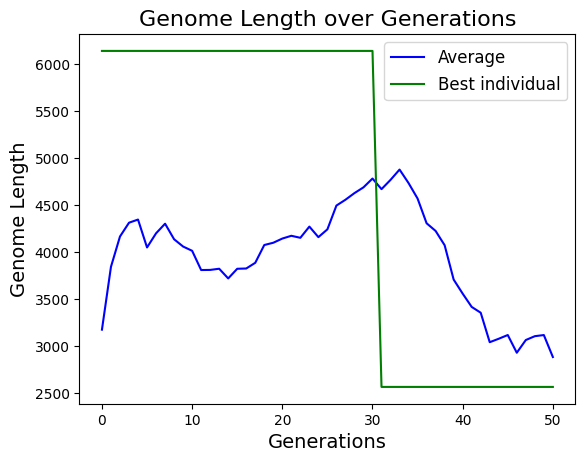

In [ ]:
plt.plot(gen, avg_length, color='blue', label="Average")
plt.plot(gen, best_ind_length, color='green', label="Best individual")
plt.legend(fontsize=12)
plt.xlabel('Generations', fontsize=14)
plt.ylabel('Genome Length', fontsize=14)
plt.title('Genome Length over Generations', fontsize=16)
plt.show()

In [ ]:
gp_best_fitness_s1_ge = best_ind_length
gp_generations_s1_ge = len(mean_fitness_values)

# Setup 2

In [ ]:
P_CROSSOVER = 0.9
P_MUTATION = 0.05

# GP Implementation 2

PSET 1

In [ ]:
toolbox = base.Toolbox()
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)
toolbox.register("expr", gp.genFull, pset=pset1, min_=MIN_TREE_HEIGHT, max_=MAX_TREE_HEIGHT)
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)
toolbox.register("compile", gp.compile, pset=pset1)
toolbox.register("evaluate", getCost)

toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genGrow, min_=MUT_MIN_TREE_HEIGHT, max_=MUT_MAX_TREE_HEIGHT)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset1)
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=LIMIT_TREE_HEIGHT))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=LIMIT_TREE_HEIGHT))

In [ ]:
population = toolbox.populationCreator(n=POPULATION_SIZE)
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

In [ ]:
stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", numpy.mean)
mstats.register("std", numpy.std)
mstats.register("min", numpy.min)
mstats.register("max", numpy.max)

In [ ]:
population, logbook = algorithms.eaSimple(population,toolbox,cxpb=P_CROSSOVER,mutpb=P_MUTATION,ngen=MAX_GENERATIONS,stats=mstats,halloffame=hof,verbose=True)

   	      	                    fitness                     	                      size                     
   	      	------------------------------------------------	-----------------------------------------------
gen	nevals	avg  	gen	max	min	nevals	std     	avg   	gen	max	min	nevals	std    
0  	500   	7.994	0  	9  	6  	500   	0.449404	19.574	0  	56 	4  	500   	11.7992
1  	450   	7.92 	1  	9  	6  	450   	0.457821	19.676	1  	61 	2  	450   	12.2507
2  	447   	7.88 	2  	9  	6  	447   	0.470744	19.424	2  	76 	1  	447   	12.3308
3  	439   	7.826	3  	10 	6  	439   	0.513541	21.486	3  	76 	1  	439   	14.0283
4  	463   	7.786	4  	9  	6  	463   	0.558752	23.21 	4  	76 	1  	463   	14.2601
5  	455   	7.676	5  	9  	6  	455   	0.582258	24.678	5  	95 	1  	455   	15.2626
6  	452   	7.626	6  	9  	6  	452   	0.621389	27.318	6  	80 	1  	452   	15.9876
7  	461   	7.606	7  	9  	6  	461   	0.64712 	28.924	7  	78 	1  	461   	16.3392
8  	449   	7.524	8  	10 	6  	449   	0.676331	32.548	8  	90 	1  	449   	16

-- Best Individual =  and_(and_(or_(or_(and_(ARG1, ARG3), and_(ARG1, and_(or_(or_(and_(and_(ARG3, ARG2), ARG0), ARG1), ARG3), ARG3))), and_(or_(not_(or_(ARG2, ARG3)), or_(not_(and_(ARG2, ARG1)), and_(and_(not_(and_(not_(ARG0), or_(not_(or_(ARG2, ARG1)), and_(ARG1, or_(ARG3, ARG2))))), ARG1), and_(ARG1, ARG0)))), or_(or_(ARG0, ARG2), or_(or_(ARG3, ARG1), and_(ARG1, ARG0))))), or_(or_(and_(ARG1, ARG0), not_(ARG3)), or_(and_(ARG2, ARG2), and_(and_(and_(or_(or_(ARG1, ARG0), ARG1), ARG1), ARG0), ARG0)))), and_(or_(or_(and_(and_(ARG3, ARG2), ARG0), ARG2), not_(and_(ARG0, or_(and_(ARG2, ARG2), and_(ARG1, ARG0))))), or_(and_(not_(ARG3), not_(ARG3)), and_(not_(and_(and_(or_(or_(ARG0, ARG2), or_(not_(ARG3), and_(and_(not_(and_(ARG1, not_(ARG0))), ARG1), ARG1))), ARG0), or_(not_(or_(ARG3, ARG1)), and_(and_(ARG1, ARG2), or_(and_(ARG1, ARG0), and_(or_(or_(and_(ARG1, ARG0), not_(ARG3)), or_(and_(ARG2, ARG2), and_(and_(ARG1, ARG0), ARG2))), not_(and_(ARG3, ARG1)))))))), or_(ARG0, ARG1)))))
-- length=

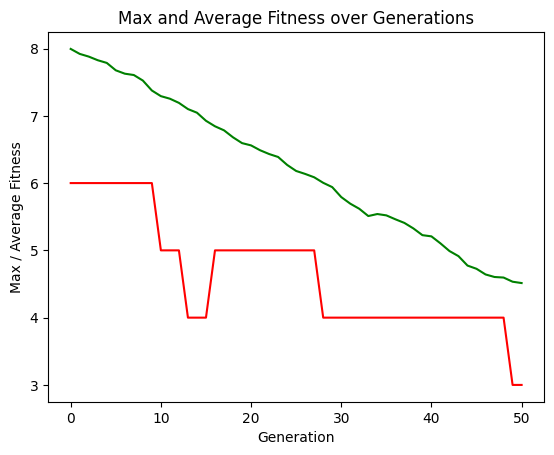

In [ ]:
maxFitnessValues, meanFitnessValues = logbook.chapters['fitness'].select("min", "avg")
best1 = hof.items[0]
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average Fitness over Generations')
plt.show()

-- Best Individual =  and_(and_(or_(or_(and_(ARG1, ARG3), and_(ARG1, and_(or_(or_(and_(and_(ARG3, ARG2), ARG0), ARG1), ARG3), ARG3))), and_(or_(not_(or_(ARG2, ARG3)), or_(not_(and_(ARG2, ARG1)), and_(and_(not_(and_(not_(ARG0), or_(not_(or_(ARG2, ARG1)), and_(ARG1, or_(ARG3, ARG2))))), ARG1), and_(ARG1, ARG0)))), or_(or_(ARG0, ARG2), or_(or_(ARG3, ARG1), and_(ARG1, ARG0))))), or_(or_(and_(ARG1, ARG0), not_(ARG3)), or_(and_(ARG2, ARG2), and_(and_(and_(or_(or_(ARG1, ARG0), ARG1), ARG1), ARG0), ARG0)))), and_(or_(or_(and_(and_(ARG3, ARG2), ARG0), ARG2), not_(and_(ARG0, or_(and_(ARG2, ARG2), and_(ARG1, ARG0))))), or_(and_(not_(ARG3), not_(ARG3)), and_(not_(and_(and_(or_(or_(ARG0, ARG2), or_(not_(ARG3), and_(and_(not_(and_(ARG1, not_(ARG0))), ARG1), ARG1))), ARG0), or_(not_(or_(ARG3, ARG1)), and_(and_(ARG1, ARG2), or_(and_(ARG1, ARG0), and_(or_(or_(and_(ARG1, ARG0), not_(ARG3)), or_(and_(ARG2, ARG2), and_(and_(ARG1, ARG0), ARG2))), not_(and_(ARG3, ARG1)))))))), or_(ARG0, ARG1)))))
-- length=

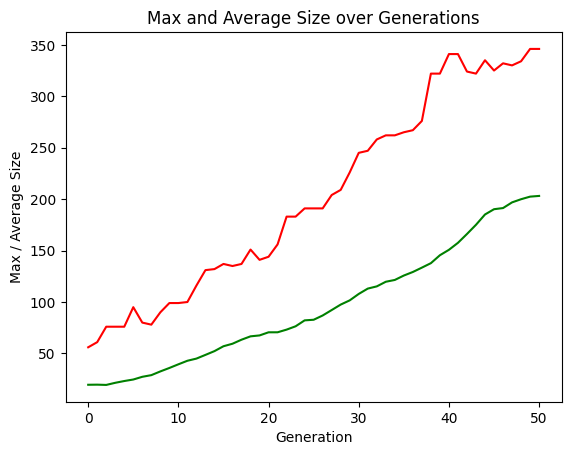

In [ ]:
maxFitnessValues, meanFitnessValues = logbook.chapters['size'].select("max", "avg")
best1 = hof.items[0]
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Size')
plt.title('Max and Average Size over Generations')
plt.show()

In [ ]:
gp_best_fitness_s2_pset1 = best1.fitness.values[0]
gp_generations_s2_pset1 = len(meanFitnessValues)

In [ ]:
toolbox = base.Toolbox()
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)
toolbox.register("expr", gp.genFull, pset=pset2, min_=MIN_TREE_HEIGHT, max_=MAX_TREE_HEIGHT)
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)
toolbox.register("compile", gp.compile, pset=pset2)
toolbox.register("evaluate", getCost)
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genGrow, min_=MUT_MIN_TREE_HEIGHT, max_=MUT_MAX_TREE_HEIGHT)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset2)
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=LIMIT_TREE_HEIGHT))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=LIMIT_TREE_HEIGHT))

In [ ]:
population = toolbox.populationCreator(n=POPULATION_SIZE)
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", numpy.mean)
mstats.register("std", numpy.std)
mstats.register("min", numpy.min)
mstats.register("max", numpy.max)
population, logbook = algorithms.eaSimple(population,toolbox,cxpb=P_CROSSOVER,mutpb=P_MUTATION,ngen=MAX_GENERATIONS,stats=mstats,halloffame=hof,verbose=True)
maxFitnessValues, meanFitnessValues = logbook.chapters['fitness'].select("min", "avg")
best2 = hof.items[0]

   	      	                    fitness                    	                      size                     
   	      	-----------------------------------------------	-----------------------------------------------
gen	nevals	avg  	gen	max	min	nevals	std    	avg   	gen	max	min	nevals	std    
0  	500   	7.968	0  	13 	4  	500   	1.16575	22.728	0  	59 	4  	500   	13.1325
1  	433   	7.754	1  	12 	4  	433   	0.986653	22.252	1  	63 	1  	433   	13.8022
2  	456   	7.578	2  	12 	0  	456   	1.25695 	23.1  	2  	64 	1  	456   	14.8745
3  	448   	7.492	3  	12 	4  	448   	1.29998 	24.43 	3  	66 	1  	448   	15.4059
4  	465   	7.422	4  	12 	0  	465   	1.27276 	26.618	4  	79 	1  	465   	16.1048
5  	443   	7.324	5  	12 	0  	443   	1.32326 	28.376	5  	81 	1  	443   	17.1007
6  	456   	7.244	6  	12 	2  	456   	1.41013 	31.058	6  	90 	1  	456   	18.5752
7  	468   	7.11 	7  	13 	2  	468   	1.53815 	34.702	7  	105	2  	468   	19.5147
8  	461   	7.106	8  	12 	2  	461   	1.48552 	37.736	8  	107	1  	461   	20.018

-- Best Individual =  not_(xor(xor(ARG2, xor(ARG0, ARG1)), and_(not_(ARG3), not_(and_(ARG3, ARG3)))))
-- length=14, height=5
-- Best Fitness =  3.0


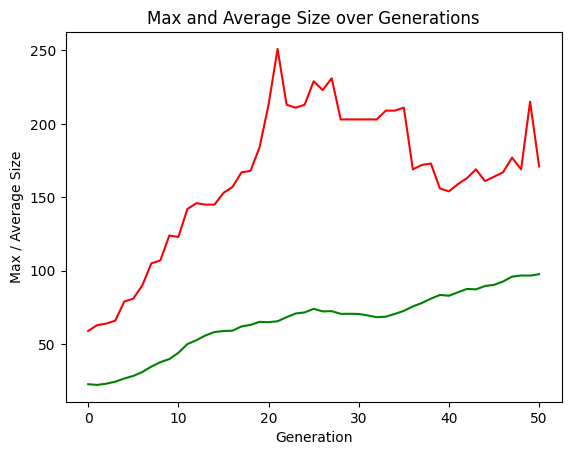

In [ ]:
maxFitnessValues, meanFitnessValues = logbook.chapters['size'].select("max", "avg")
best2 = hof.items[0]
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Size')
plt.title('Max and Average Size over Generations')
plt.show()

-- Best Individual =  not_(xor(xor(ARG2, xor(ARG0, ARG1)), and_(not_(ARG3), not_(and_(ARG3, ARG3)))))
-- length=14, height=5
-- Best Fitness =  0.0


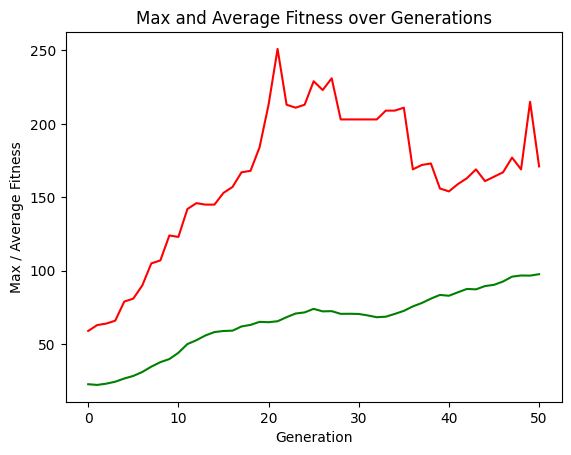

In [ ]:
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average Fitness over Generations')
plt.show()

In [ ]:
gp_best_fitness_s2_pset2 = best1.fitness.values[0]
gp_generations_s2_pset2 = len(meanFitnessValues)


# GE Implementation 2


Set a problem to solve. We can choose 'parity3', 'parity4' or 'parity5'.

The parameters in the previous cell are recommended to solve the problem with 3 bits.

In [ ]:
problem = 'parity4'

Read datasets and grammars according to the problem picked in the previous cell.

Notice we read the data in from a file rather than simply generate it. While not strictly necessary, it is a nice piece of functionality that we'll use in later notebooks.

In [ ]:
if problem == 'parity3':
    X_train = np.zeros([3,8], dtype=bool)
    Y_train = np.zeros([8,], dtype=bool)

    data = pd.read_table(r"datasets/parity3.csv")
    for i in range(3):
        for j in range(8):
            X_train[i,j] = data['d'+ str(i)].iloc[j]
    for i in range(8):
        Y_train[i] = data['output'].iloc[i]

    GRAMMAR_FILE = 'parity3.bnf'

elif problem == 'parity4':
    X_train = np.zeros([4,16], dtype=bool)
    Y_train = np.zeros([16,], dtype=bool)

    data = pd.read_table(r"datasets/parity4.csv")
    for i in range(4):
        for j in range(16):
            X_train[i,j] = data['d'+ str(i)].iloc[j]
    for i in range(16):
        Y_train[i] = data['output'].iloc[i]

    # GRAMMAR_FILE = 'parity4.bnf'
    GRAMMAR_FILE = 'parity4_v3.bnf'

elif problem == 'parity5':
    X_train = np.zeros([5,32], dtype=bool)
    Y_train = np.zeros([32,], dtype=bool)

    data = pd.read_table(r"datasets/parity5.csv")
    for i in range(5):
        for j in range(32):
            X_train[i,j] = data['d'+ str(i)].iloc[j]
    for i in range(32):
        Y_train[i] = data['output'].iloc[i]

    GRAMMAR_FILE = 'parity5.bnf'

Print data.

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10000)
pd.set_option('display.colheader_justify', 'center')

display(data)

,d0,d1,d2,d3,output
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,1,1
4,0,1,0,0,0
5,0,1,0,1,1
6,0,1,1,0,1
7,0,1,1,1,0
8,1,0,0,0,0
9,1,0,0,1,1


In [ ]:
f = open("grammars/" + GRAMMAR_FILE, "r")
print(f.read())
f.close()

<e>  ::=  and_(<e>,<e>)|
          or_(<e>,<e>)|
          nand_(<e>,<e>)|
          nor_(<e>,<e>)|
		  <x>
<x> ::=   x[0]|x[1]|x[2]|x[3]


In [ ]:
BNF_GRAMMAR = grape.Grammar(path.join("grammars", GRAMMAR_FILE))

In [ ]:
def fitness_eval(individual, points):
    x = points[0]
    Y = points[1]

    if individual.invalid == True:
        return np.NaN,

    try:
        pred = eval(individual.phenotype)
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError):
        return np.NaN,
    assert np.isrealobj(pred)
    n_samples = len(Y)
    compare = np.equal(Y,pred)
    n_correct_outputs = np.sum(compare)
    fitness = n_samples - n_correct_outputs
    return fitness,

In [ ]:
toolbox = base.Toolbox()
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create('Individual', grape.Individual, fitness=creator.FitnessMin)
toolbox.register("populationCreator", grape.sensible_initialisation, creator.Individual)
toolbox.register("evaluate", fitness_eval)
toolbox.register("select", tools.selTournament, tournsize=6)
toolbox.register("mate", grape.crossover_onepoint)
toolbox.register("mutate", grape.mutation_int_flip_per_codon)

In [ ]:
# create initial population (generation 0):
population = toolbox.populationCreator(pop_size=POPULATION_SIZE,
                                      bnf_grammar=BNF_GRAMMAR,
                                      min_init_depth=MIN_INIT_TREE_DEPTH,
                                      max_init_depth=MAX_INIT_TREE_DEPTH,
                                      codon_size=CODON_SIZE,
                                      codon_consumption=CODON_CONSUMPTION,
                                      genome_representation=GENOME_REPRESENTATION
                                      )

In [ ]:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.nanmean)
stats.register("std", np.nanstd)
stats.register("min", np.nanmin)
stats.register("max", np.nanmax)

In [ ]:
population, logbook = algorithms.ge_eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, elite_size=ELITE_SIZE,
                                              bnf_grammar=BNF_GRAMMAR,
                                              codon_size=CODON_SIZE,
                                              max_tree_depth=MAX_TREE_DEPTH,
                                              max_genome_length=MAX_GENOME_LENGTH,
                                              points_train=[X_train, Y_train],
                                              codon_consumption=CODON_CONSUMPTION,
                                              report_items=REPORT_ITEMS,
                                              genome_representation=GENOME_REPRESENTATION,
                                              stats=stats, halloffame=hof, verbose=False)

gen = 0 , Best fitness = (5.0,)
gen = 1 , Best fitness = (5.0,) , Number of invalids = 56
gen = 2 , Best fitness = (5.0,) , Number of invalids = 10
gen = 3 , Best fitness = (5.0,) , Number of invalids = 14
gen = 4 , Best fitness = (5.0,) , Number of invalids = 9
gen = 5 , Best fitness = (5.0,) , Number of invalids = 7
gen = 6 , Best fitness = (5.0,) , Number of invalids = 5
gen = 7 , Best fitness = (5.0,) , Number of invalids = 0
gen = 8 , Best fitness = (5.0,) , Number of invalids = 0
gen = 9 , Best fitness = (5.0,) , Number of invalids = 0
gen = 10 , Best fitness = (5.0,) , Number of invalids = 0
gen = 11 , Best fitness = (5.0,) , Number of invalids = 0
gen = 12 , Best fitness = (5.0,) , Number of invalids = 0
gen = 13 , Best fitness = (5.0,) , Number of invalids = 0
gen = 14 , Best fitness = (5.0,) , Number of invalids = 0
gen = 15 , Best fitness = (5.0,) , Number of invalids = 0
gen = 16 , Best fitness = (5.0,) , Number of invalids = 0
gen = 17 , Best fitness = (5.0,) , Number of i

Extract statistics and build a nice looking table.

In [ ]:
max_fitness_values, mean_fitness_values = logbook.select("max", "avg")
min_fitness_values, std_fitness_values = logbook.select("min", "std")

best_ind_length = logbook.select("best_ind_length")
avg_length = logbook.select("avg_length")

selection_time = logbook.select("selection_time")
generation_time = logbook.select("generation_time")
gen, invalid = logbook.select("gen", "invalid")
avg_used_codons = logbook.select("avg_used_codons")
best_ind_used_codons = logbook.select("best_ind_used_codons")

best_ind_nodes = logbook.select("best_ind_nodes")
avg_nodes = logbook.select("avg_nodes")

avg_depth = logbook.select("avg_depth")

header = REPORT_ITEMS

results = pd.DataFrame(list(zip(gen, invalid, mean_fitness_values, std_fitness_values,
                                min_fitness_values, max_fitness_values,
                                best_ind_length, avg_length,
                                best_ind_nodes, avg_nodes,
                                avg_depth,
                                avg_used_codons, best_ind_used_codons,
                                selection_time, generation_time)),
               columns = header)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10000)
pd.set_option('display.colheader_justify', 'center')

display(results)

,gen,invalid,avg,std,min,max,best_ind_length,avg_length,best_ind_nodes,avg_nodes,avg_depth,avg_used_codons,best_ind_used_codons,selection_time,generation_time
0,0,0,8.002000,0.655741,5.0,13.0,4606,2460.562000,1024,547.206000,10.056000,1640.618000,3071,0.000000,5.694034
1,1,56,7.984234,0.317967,5.0,10.0,4606,2867.227477,1024,13.063063,4.858108,38.189189,3071,0.008717,66.655615
2,2,10,7.928571,0.321032,5.0,9.0,4606,2692.712245,1024,9.914286,4.614286,28.742857,3071,0.003376,116.569515
3,3,14,7.927984,0.375372,5.0,10.0,4606,2795.358025,1024,9.703704,4.944444,28.111111,3071,0.006469,28.515189
4,4,9,7.928717,0.399860,5.0,10.0,4606,3077.429735,1024,9.835031,5.376782,28.505092,3071,0.006155,6.002683
5,5,7,7.896552,0.449756,5.0,9.0,4606,3182.740365,1024,10.018256,5.908722,29.054767,3071,0.003440,9.186903
6,6,5,7.880808,0.462684,5.0,10.0,4606,3215.204040,1024,10.729293,5.979798,31.187879,3071,0.003853,5.879765
7,7,0,7.910000,0.499900,5.0,9.0,4606,3311.778000,1024,10.272000,6.174000,29.816000,3071,0.003378,6.787268
8,8,0,7.888000,0.476923,5.0,10.0,4606,3200.252000,1024,9.032000,6.264000,26.096000,3071,0.003363,41.679663
9,9,0,7.898000,0.532537,5.0,10.0,4606,3264.168000,1024,8.140000,6.052000,23.420000,3071,0.003677,18.822865


Show the best individual as an expression.

In [ ]:
import textwrap
best = hof.items[0].phenotype

Plot graphs regarding the best fitness and the average fitness.

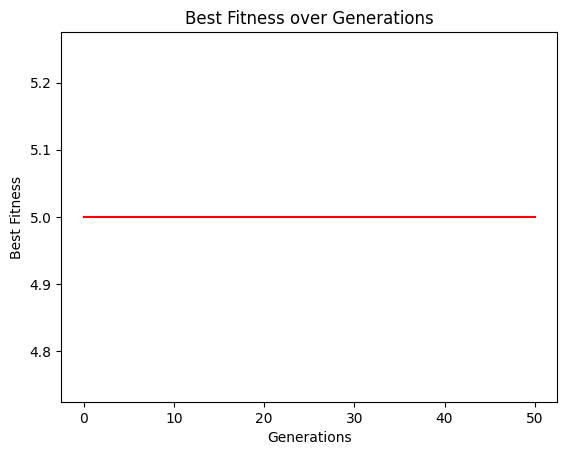

In [ ]:
plt.plot(min_fitness_values, color='red')
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.title('Best Fitness over Generations')
plt.show()

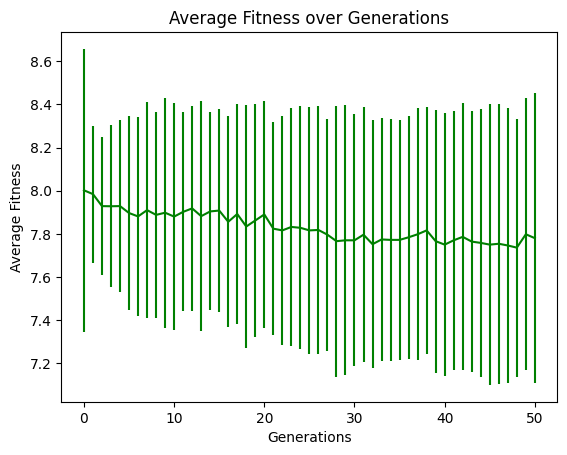

In [ ]:
gen = np.arange(0, 50+1)
plt.xlabel('Generations')
plt.ylabel('Average Fitness')
plt.title('Average Fitness over Generations')
plt.errorbar(gen, mean_fitness_values, yerr=std_fitness_values,label="Best", color="Green")
plt.show()

Plot graphs regarding the length of the genome: the average of the population and that one of the best individual.


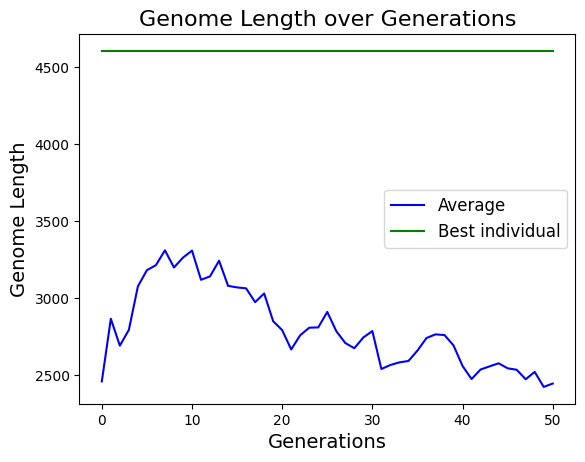

In [ ]:
plt.plot(gen, avg_length, color='blue', label="Average")
plt.plot(gen, best_ind_length, color='green', label="Best individual")
plt.legend(fontsize=12)
plt.xlabel('Generations', fontsize=14)
plt.ylabel('Genome Length', fontsize=14)
plt.title('Genome Length over Generations', fontsize=16)
plt.show()

In [ ]:
gp_best_fitness_s2_ge = best_ind_length
gp_generations_s2_ge = len(mean_fitness_values)

# Comparison

In [ ]:
# Setup 1 Results
print("-- Best Fitness for PSET1 = ", gp_best_fitness_s1_pset1)
print("-- Number of Generations = ", gp_generations_s1_pset1)
print("-- Best Fitness for PSET2 = ", gp_best_fitness_s1_pset2)
print("-- Number of Generations = ", gp_generations_s1_pset2)

print("-- Best Fitness for GE= ", gp_best_fitness_s1_ge)
print("-- Number of Generations = ", gp_generations_s1_ge)

# Setup 2 Results
print("-- Best Fitness for PSET1 = ", gp_best_fitness_s2_pset1)
print("-- Number of Generations = ", gp_generations_s2_pset1)
print("-- Best Fitness for PSET2 = ", gp_best_fitness_s2_pset2)
print("-- Number of Generations = ", gp_generations_s2_pset2)

print("-- Best Fitness for GE = ", gp_best_fitness_s2_ge)
print("-- Number of Generations = ", gp_generations_s2_ge)

-- Best Fitness for PSET1 =  3.0
-- Number of Generations =  51
-- Best Fitness for PSET2 =  0.0
-- Number of Generations =  51
-- Best Fitness for GE=  [6142, 6142, 6142, 6142, 6142, 6142, 6142, 6142, 6142, 6142, 6142, 6142, 6142, 6142, 6142, 6142, 6142, 6142, 6142, 6142, 6142, 6142, 6142, 6142, 6142, 6142, 6142, 6142, 6142, 6142, 6142, 2565, 2565, 2565, 2565, 2565, 2565, 2565, 2565, 2565, 2565, 2565, 2565, 2565, 2565, 2565, 2565, 2565, 2565, 2565, 2565]
-- Number of Generations =  51
-- Best Fitness for PSET1 =  3.0
-- Number of Generations =  51
-- Best Fitness for PSET2 =  3.0
-- Number of Generations =  51
-- Best Fitness for GE =  [4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606, 4606]
-- Number of Generations =  51
